In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as cat_encoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
import sys
sys.path.append("C:/Users/abhij/Documents/University of Tuebingen/Data Literacy/Project/Data_Literacy/")

In [3]:
from src import preprocessing

In [4]:
data = pd.read_csv('C:/Users/abhij/Documents/University of Tuebingen/Data Literacy/Project/Data_Literacy/data/telecom_churn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

`Churn` is the binary target variable indicating `True` for the telecom company losing its customer and `False` is the customer continues service and is retained.

In [6]:
process = preprocessing.processing(data)

In [7]:
process.start()

dummies done


In [8]:
processed_data = process.data

In [9]:
processed_data.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_0,State_1,State_2,State_3,State_4,State_5,International plan_0,International plan_1,Voice mail plan_0,Voice mail plan_1
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,1,0,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,0,0,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,1,1,0,1,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,1,0,1,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,1,0,0,1,0,1,0


In [10]:
numeric_cols = ['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

### Check for correlation between the target variable 'churn' and other numeric variables

In [94]:
import matplotlib


matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'NeurIPS',
    'text.usetex': True,
    'pgf.rcfonts': True,
})


In [12]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27
    golden_ratio = (5**.5 - 1) / 2
    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)

In [13]:
set_size(350)

(4.8429500484295005, 2.993107735747381)

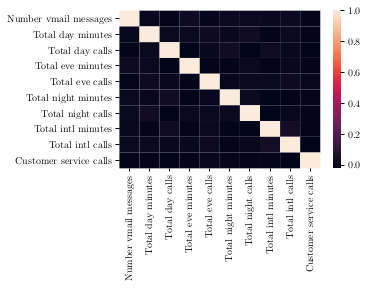

In [95]:
# Calculate and plot correlation heat map
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(w=4.5, h=2.9)
plt.rcParams["font.family"] = "NeurIPS"
corr = sns.heatmap(processed_data[numeric_cols].corr()); 
corr.figure.savefig('corr.pdf', transparent=True, bbox_inches='tight')

In [15]:
# Create y
# drop churn from data
# drop dependent numeric variables
# update numeric columns
y = processed_data['Churn']
processed_data = processed_data.drop(['Churn','Total day charge', 'Total eve charge', 'Total night charge', 
                                      'Total intl charge'], axis=1)
numeric_cols = ['Number vmail messages', 'Total day minutes', 'Total day calls', 
                'Total eve minutes', 'Total eve calls','Total night minutes',
                'Total night calls',  'Total intl minutes', 'Total intl calls',  'Customer service calls']

In [16]:
np.sum(y)/len(y) #data is unbalanced

0.14491449144914492

In [17]:
processed_data.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls',
       'State_0', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'International plan_0', 'International plan_1', 'Voice mail plan_0',
       'Voice mail plan_1'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

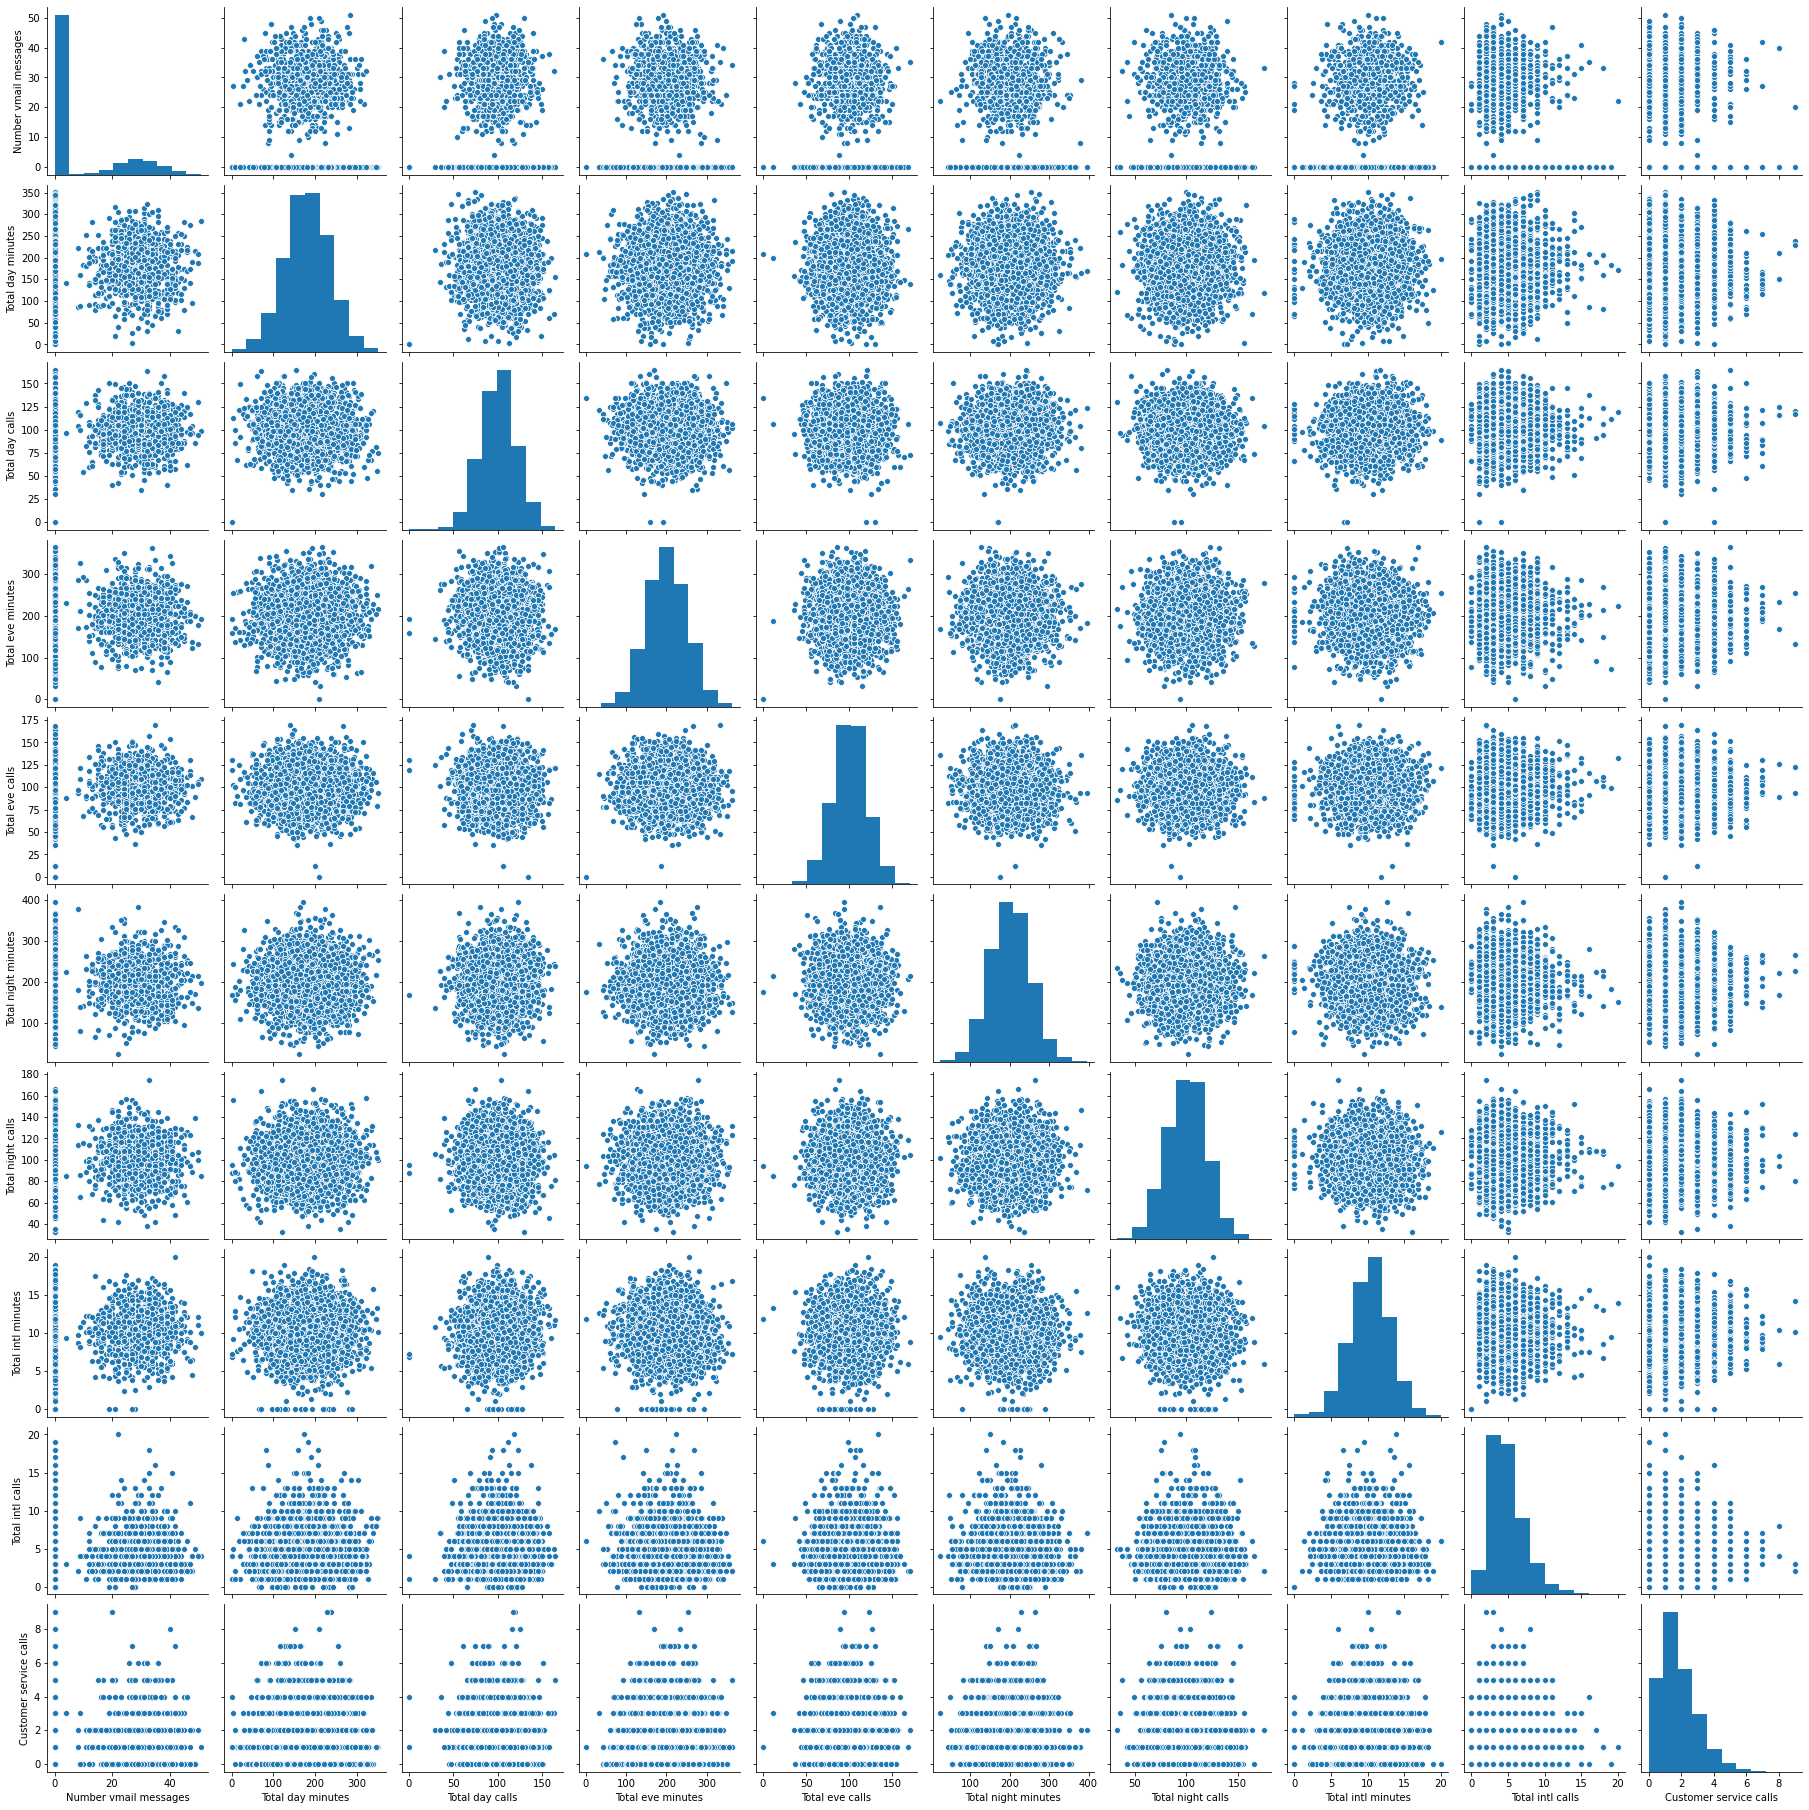

In [18]:
# %config InlineBackend.figure_format = 'png'
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(processed_data[numeric_cols])
plt.savefig('pair.png', transparent=True, bbox_inches='tight')

In [19]:
processed_data = processed_data.drop(['Account length', 'Area code'], axis  =1)

In [20]:
processed_data.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'State_0', 'State_1', 'State_2', 'State_3',
       'State_4', 'State_5', 'International plan_0', 'International plan_1',
       'Voice mail plan_0', 'Voice mail plan_1'],
      dtype='object')

In [21]:
# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(processed_data)

In [22]:
tsne5 = TSNE(random_state=0, perplexity = 5)
tsne5_repr = tsne5.fit_transform(X_scaled)

tsne30 = TSNE(random_state=0, perplexity = 30)
tsne30_repr = tsne30.fit_transform(X_scaled)

tsne50 = TSNE(random_state=0, perplexity = 50)
tsne50_repr = tsne50.fit_transform(X_scaled)

tsne100 = TSNE(random_state=0, perplexity = 100)
tsne100_repr = tsne100.fit_transform(X_scaled)

In [23]:
temp = []
for i in data.Churn:
    if i:
        temp.append('Yes')
    else:
        temp.append('No')
data['Churned'] = temp

findfont: Font family ['NeurIPS'] not found. Falling back to DejaVu Sans.


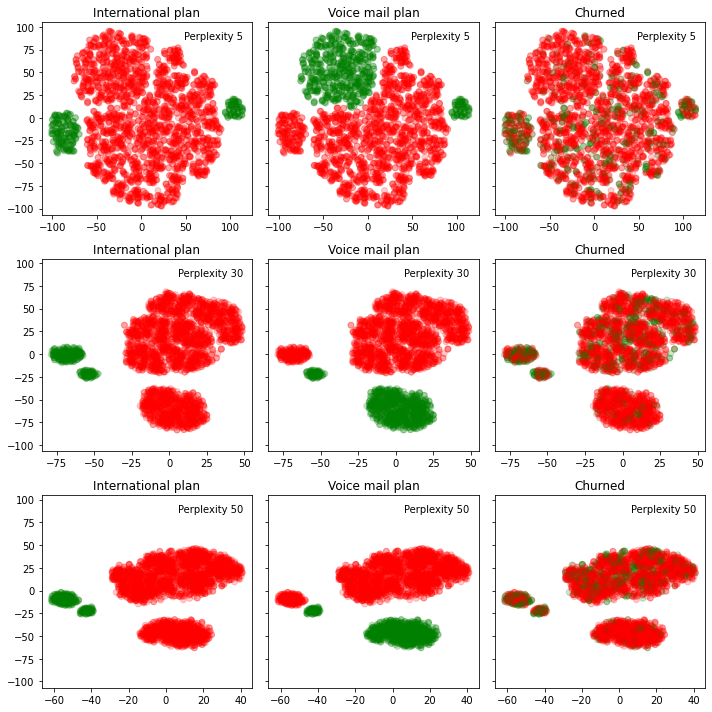

In [24]:
_, axes = plt.subplots(3, 3, sharey=True, figsize=(10, 10))
tsne_repr = [tsne5_repr,tsne30_repr,tsne50_repr] #,tsne100_repr]
perp = [5,30,50,100]

for i in range(3):
    for j, name in enumerate(["International plan", "Voice mail plan", "Churned"]):
        axes[i,j].scatter(
            tsne_repr[i][:, 0],
            tsne_repr[i][:, 1],
            c=data[name].map({"Yes": "green", "No": "red"}),
            alpha=0.2, label = 'Perplexity %s'%perp[i]
        )
        
        axes[i,j].set_title(name);
        axes[i,j].legend(loc='upper right', frameon=False)
        axes[i,j].get_legend().legendHandles[0].set_color('white')
plt.tight_layout()
plt.savefig('tsne.pdf', transparent=True, bbox_inches='tight')

In [25]:
import colorsys

def get_N_HexCol(N):
    HSV_tuples = [(x * 1.0 / N, 0.5, 0.5) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

In [26]:
keys = pd.unique(data['State'])
val_list = get_N_HexCol(len(pd.unique(data['State'])))

color_dict = dict(zip(keys,val_list))

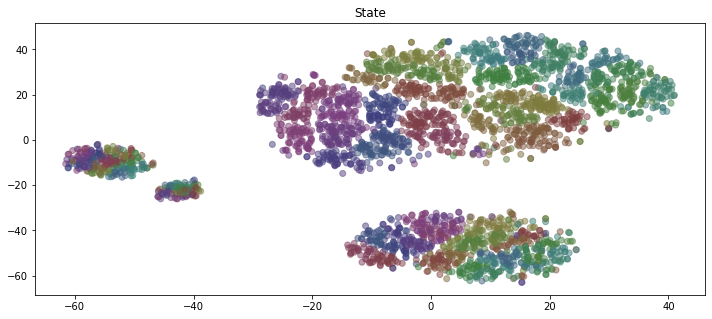

In [28]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(12, 5))

for i, name in enumerate(["State"]):
    axes.scatter(
        tsne_repr[2][:, 0],
        tsne_repr[2][:, 1],
        c=data[name].map(color_dict),
        alpha=0.5,
    )
    axes.set_title(name);

In [29]:
processed_data.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'State_0', 'State_1', 'State_2', 'State_3',
       'State_4', 'State_5', 'International plan_0', 'International plan_1',
       'Voice mail plan_0', 'Voice mail plan_1'],
      dtype='object')

## Prediction

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_data, y, test_size=0.20, random_state=0)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score
from sklearn.metrics import f1_score, recall_score, precision_recall_curve



logisticRegr0 = LogisticRegression(random_state=0, class_weight=None)
logisticRegr0.fit(x_train, y_train)
y_pred_0 = logisticRegr0.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_0)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_0)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_0)}')
print(f'Recall score: {recall_score(y_test,y_pred_0)}')

Accuracy Score: 0.856071964017991
Confusion Matrix: 
[[563  16]
 [ 80   8]]
Area Under Curve: 0.5316376197205213
Recall score: 0.09090909090909091


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
w = {0:20, 1:80}
logisticRegr1 = LogisticRegression(random_state=0, class_weight=w)
logisticRegr1.fit(x_train, y_train)
y_pred_1 = logisticRegr1.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_1)}')
print(f'Recall score: {recall_score(y_test,y_pred_1)}')

Accuracy Score: 0.7796101949025487
Confusion Matrix: 
[[466 113]
 [ 34  54]]
Area Under Curve: 0.7092361438216361
Recall score: 0.6136363636363636


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

'\nsns.heatmap(cm_0, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = \'Blues_r\');\nplt.ylabel(\'Actual label\');\nplt.xlabel(\'Predicted label\');\nall_sample_title = \'Accuracy Score: {0}\'.format(score)\nplt.title(all_sample_title, size = 15);\n'

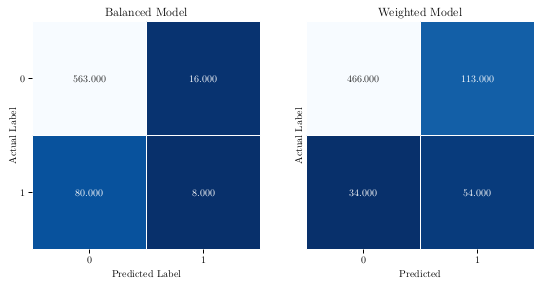

In [88]:
from sklearn import metrics
cm_0 = metrics.confusion_matrix(y_test, y_pred_0)
cm_1 = metrics.confusion_matrix(y_test, y_pred_1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,9))
ax1.get_shared_y_axes().join(ax2)
g1 = sns.heatmap(cm_0,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',ax=ax1, cbar = False)
g1.set_ylabel('Actual Label')
g1.set_xlabel('Predicted Label')
g1.set_title('Balanced Model')
g2 = sns.heatmap(cm_1,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',ax=ax2, cbar=False)
g2.set_ylabel('Actual Label')
g2.set_xlabel('Predicted')
g2.set_title('Weighted Model')
g2.set_yticks([])

for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.savefig('conf_mat.pdf', transparent=True, bbox_inches='tight')

"""
sns.heatmap(cm_0, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
"""

In [89]:
print(logisticRegr1.coef_)

[[-2.13975650e-02  1.12263793e-02 -8.77188257e-03  2.54380469e-03
  -8.55256672e-03  9.76313320e-04 -1.03329299e-02  1.37191636e-02
  -3.49111390e-02  4.56086669e-01  8.80972555e-02 -2.96434577e-01
  -9.79201021e-02  6.42826436e-02  2.74481790e-01 -7.57860269e-02
   9.89498286e-01 -1.17881216e+00 -8.54003353e-02 -1.03913539e-01]]


In [90]:
keys = list(processed_data.columns)
values = logisticRegr1.coef_.tolist()[0]
weights_dict = dict(zip(keys,[round(value, 3) for value in values]))
weights_dict

{'Number vmail messages': -0.021,
 'Total day minutes': 0.011,
 'Total day calls': -0.009,
 'Total eve minutes': 0.003,
 'Total eve calls': -0.009,
 'Total night minutes': 0.001,
 'Total night calls': -0.01,
 'Total intl minutes': 0.014,
 'Total intl calls': -0.035,
 'Customer service calls': 0.456,
 'State_0': 0.088,
 'State_1': -0.296,
 'State_2': -0.098,
 'State_3': 0.064,
 'State_4': 0.274,
 'State_5': -0.076,
 'International plan_0': 0.989,
 'International plan_1': -1.179,
 'Voice mail plan_0': -0.085,
 'Voice mail plan_1': -0.104}